In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Draw
from matplotlib import pyplot as plt
import numpy as np

def parse_sdf_to_dataframe(sdf_path):
    """
    Parse an SDF file into a pandas DataFrame of molecules and their properties.

    Args:
        sdf_path (str): Path to the SDF file.

    Returns:
        pd.DataFrame: DataFrame containing molecules and their properties.
    """
    suppl = Chem.SDMolSupplier(sdf_path)
    data = []
    for mol in suppl:
        if mol is None:
            continue  # Skip invalid molecules
        props = mol.GetPropsAsDict()
        props['rdkit_mol'] = mol  # Store the molecule object itself
        data.append(props)
    df = pd.DataFrame(data)
    return df
def parse_sdf_to_array(sdf_path):
    """
    Parse an SDF file into a numpy array of molecules and their properties.

    Args:
        sdf_path (str): Path to the SDF file.
        
    Returns:
        np.ndarray: Array containing molecules and their properties.
    """
    suppl = Chem.SDMolSupplier(sdf_path)
    data = []
    for mol in suppl:
        if mol is None:
            continue  # Skip invalid molecules
        props = mol.GetPropsAsDict()
        props['rdkit_mol'] = mol  # Store the molecule object itself
        data.append(props)
    return np.array(data)



In [7]:
mols = parse_sdf_to_array("data/quanti_benchmarks/smrt_small.sdf")

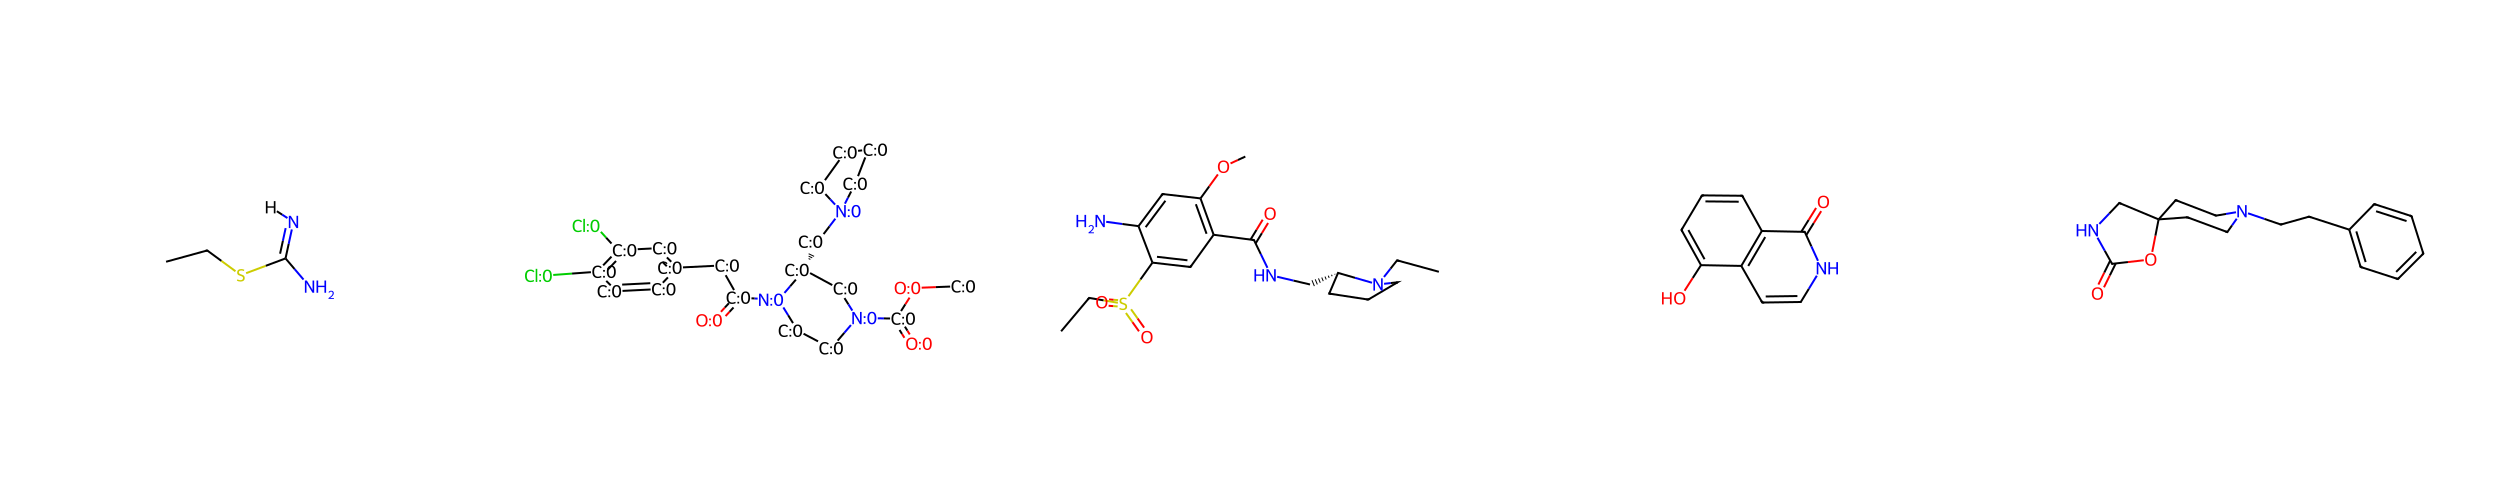

In [8]:
# Draw first 5 molecules in grid 
molgrid = [mols[i]['rdkit_mol'] for i in range(5)]
Draw.MolsToGridImage(molgrid, molsPerRow=5, subImgSize=(500,500))

In [9]:
from elektronn import utils